#Author: Md Mintu Miah, PhD; Post Doctoral Researcher at PATH, UC Berkeley
#Project: Contract 65A0911: Complete Cities: Bicycle Network Connectivity Evaluation Methodology
#PI: Alex Skabardonis, PhD, Professor, UC Berkeley

In [1]:
#!pip install pybna # if you need to install please remove comment out

In [1]:
# if you need to install please remove comment out
#!pip install -r requirements.txt
#!pip install SQLAlchemy
#!pip install momepy

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from collections.abc import Mapping
from distutils.version import LooseVersion
from pybna import Importer
import geopandas as gpd
import pybna

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pybna\dbutils.py:13: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://s

In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import fiona
from shapely.ops import unary_union
import networkx as nx
import itertools
import osmnx as ox
import math
import momepy
import matplotlib.pyplot as plt
from shapely.geometry import Point
import io

In [4]:
from shapely.geometry import Polygon
import numpy as np
from shapely.geometry import Point
from functools import reduce
#import matplotlib.pyplot as plt  ## not needed
from shapely.geometry import Point, Polygon, MultiPolygon, LineString
import csv
from time import time
import time
from geopandas import GeoSeries, GeoDataFrame

In [5]:
#conda install arcpy=3.0 -c esri

In [9]:
#import arcpy
#from arcpy import env

In [6]:
%%time
# Import Configuration file
i = pybna.Importer(config="config.yaml")
# Import Study Area boundary shape file
i.import_boundary('geo_export_b69ec18e-6a40-4637-94f6-1f3aafe63144.shp', overwrite=True)
# Mention the State fips, for California it is 6
i.import_census_blocks(fips=6, overwrite=True)
i.import_census_jobs("received.neighborhood_census_block_jobs",state="CA", overwrite=True)

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\yaml\__init__.py:125: ResourceWarning: unclosed file <_io.TextIOWrapper name='config.yaml' mode='r' encoding='cp1252'>
  return load(stream, SafeLoader)


Connecting to database
Copying boundary to database
Loading boundary


C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\io\sql.py:158: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


Loading data from http://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_06_pophu.zip
Filtering blocks to boundary
Filtering out water
Copying blocks to database
Loading data for state CA
No data for state CA for year 2020. Checking previous year.


C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pybna\importer.py:351: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jobs = jobs_main.append(jobs_aux,ignore_index=True)


Copying jobs to database
CPU times: total: 3min 22s
Wall time: 14min 53s


In [7]:
%%time
i.import_osm_network(overwrite=True)

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\io\sql.py:158: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


Copying OSM ways to database
Copying OSM intersections to database
Processing OSM data in database
CPU times: total: 37min 3s
Wall time: 49min 21s


In [8]:
%%time
#Increase the timeout in your importer file if your computer is weak to avoid error
#i.import_osm_destinations(overwrite=True)


CPU times: total: 0 ns
Wall time: 0 ns


In [13]:
%%time
# stress
s = pybna.Stress(config='config.yaml')
s.segment_stress()
s.crossing_stress()

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\yaml\__init__.py:125: ResourceWarning: unclosed file <_io.TextIOWrapper name='config.yaml' mode='r' encoding='cp1252'>
  return load(stream, SafeLoader)


Connecting to database
Calculating stress on shared streets
Calculating stress on streets with bike lanes
Calculating stress on streets with cycle tracks
Calculating stress on paths
Calculating stress on shared streets
Calculating stress on streets with bike lanes
Calculating stress on streets with cycle tracks
Calculating stress on paths
  ....forward
  ....backward
CPU times: total: 688 ms
Wall time: 8min 24s


In [10]:
#%%time
# connectivity
#bna = pybna.pyBNA(config='config.yaml')
#bna.calculate_connectivity()

In [11]:
#%%time
# scores
#bna.score("myschema.my_scores_table")
#bna.aggregate("myschema.my_aggregate_score_table")

In [5]:
# Read the LTS shape file
lts=gpd.read_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/neighborhood_ways.shp")
lts = lts.rename(columns={'OSMID':'osmid'})
lts=lts.rename({'INTERSECTI':'u', 'INTERSE_01':'v'}, axis='columns')
lts['length']=lts.length
lts.head()

,ROAD_ID,osmid,FUNCTIONAL,PATH_ID,ONE_WAY,u,v,WIDTH,SPEED_LIMI,FT_BIKE_IN,...,TWLTL_CROS,FT_PARK,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length
0,111276,{31439803},tertiary,None,ft,419038,419030,NaN,NaN,None,...,None,?,?,4.0,NaN,NaN,3.0,None,"LINESTRING (91536.677 -976.326, 91560.948 -973...",24.398252
1,162454,{93291777},tertiary,None,ft,364379,364375,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (108350.827 -24102.437, 108425.349 ...",75.902661
2,165633,{184388728},primary,None,ft,329656,329657,NaN,35.0,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (94730.324 -23220.754, 94768.157 -2...",37.835842
3,888344,{53726448},tertiary,None,ft,76716,76717,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (65934.473 27367.107, 65935.819 273...",1.539394
4,923150,{655711604},residential,None,ft,129104,129102,NaN,NaN,None,...,None,?,?,1.0,NaN,NaN,NaN,None,"LINESTRING (41921.847 57781.540, 41918.170 577...",3.697954


In [6]:
lts.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Lets calculate the slope for each link

In [7]:
#https://pysal.org/scipy2019-intermediate-gds/deterministic/gds2-rasters.html
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt

In [8]:
# Open the raster image
barea_slope = rasterio.open('H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Slope/Slope/cslope11.img')
print(barea_slope.crs)
#rioplot.show(barea_slope)

EPSG:4269


In [9]:
# only band is elev value (in m)
band1 = barea_slope.read(1, masked=True)  # mask noData cells [shouldn't be necessary on land]
stats = {'min': band1.min(), 'mean': band1.mean(), 'max': band1.max()}
print(stats)

{'min': -104, 'mean': 236.201825257043, 'max': 1784}


In [10]:
# Reproject the geometries by replacing the values with projected ones
lts_new = lts.to_crs(epsg=4326)
lts_new.head(10)

,ROAD_ID,osmid,FUNCTIONAL,PATH_ID,ONE_WAY,u,v,WIDTH,SPEED_LIMI,FT_BIKE_IN,...,TWLTL_CROS,FT_PARK,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length
0,111276,{31439803},tertiary,None,ft,419038,419030,NaN,NaN,None,...,None,?,?,4.0,NaN,NaN,3.0,None,"LINESTRING (-121.95749 37.52394, -121.95722 37...",24.398252
1,162454,{93291777},tertiary,None,ft,364379,364375,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-121.76918 37.31464, -121.76834 37...",75.902661
2,165633,{184388728},primary,None,ft,329656,329657,NaN,35.0,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-121.92277 37.32337, -121.92235 37...",37.835842
3,888344,{53726448},tertiary,None,ft,76716,76717,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-122.24642 37.78016, -122.24640 37...",1.539394
4,923150,{655711604},residential,None,ft,129104,129102,NaN,NaN,None,...,None,?,?,1.0,NaN,NaN,NaN,None,"LINESTRING (-122.51925 38.05433, -122.51929 38...",3.697954
5,955824,{502817925},tertiary,None,ft,124992,124987,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-122.56019 38.01438, -122.55981 38...",35.877744
6,463165,{758004215},residential,None,ft,72994,72996,NaN,NaN,None,...,None,?,?,1.0,1.0,NaN,1.0,None,"LINESTRING (-121.95331 37.76988, -121.95271 37...",88.638366
7,513383,{792316869},secondary,None,ft,164789,165035,NaN,30.0,None,...,None,?,?,4.0,NaN,NaN,NaN,None,"LINESTRING (-122.05952 37.93424, -122.05967 37...",61.709085
8,67412,{393791123},tertiary,None,ft,295993,295988,NaN,NaN,lane,...,None,?,?,3.0,NaN,NaN,1.0,None,"LINESTRING (-121.77421 37.23356, -121.77512 37...",100.762064
9,180018,{417891815},primary,None,ft,325209,325205,NaN,NaN,lane,...,None,?,?,3.0,NaN,NaN,NaN,None,"LINESTRING (-121.90356 37.34089, -121.90344 37...",10.743065


In [ ]:
# get the slope for each link of the network
%time
lts_new
# First identify the starting and ending node of each link
lts_new['starting point'] = None
lts_new['ending point'] = None

for index, row in lts_new.iterrows():
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    lts_new.at[index,'starting point'] = Point(first_coord)
    lts_new.at[index,'ending point'] = Point(last_coord)
    lts_new

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
lts_new.head(5)

In [ ]:
#lts_new['FUNCTIONAL'].unique()

In [ ]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
lts_new.boundary.plot(ax=ax, color='orangered')
show(barea_slope, ax=ax)

In [ ]:
# Calculate each link starting lat and long
sf1=lts_new.loc[:,["ROAD_ID","starting point"]]
sf1.columns=["ROAD_ID","geometry"]
sf1['start_lon'] = sf1.geometry.apply(lambda p: p.x)
sf1['start_lat'] = sf1.geometry.apply(lambda p: p.y)
sf2=sf1.loc[:,["ROAD_ID","geometry","start_lon","start_lat"]]
sf2.head(5)

In [ ]:
# Calculate each link starting elevation
sf2["starting_ele"]= None
#point in test['geometry']:
x = sf2["start_lon"]
y = sf2["start_lat"]
row, col = barea_slope.index(x,y)
sf2["starting_ele"]=barea_slope.read(1)[row,col]

In [ ]:
sf2.head()

In [ ]:
%%time
# Calculate each link end point elevation
ef1=lts_new.loc[:,["ROAD_ID","ending point"]]
ef1.columns=["ROAD_ID","geometry"]
ef1['end_lon'] = ef1.geometry.apply(lambda p: p.x)
ef1['end_lat'] = ef1.geometry.apply(lambda p: p.y)
ef2=ef1.loc[:,["ROAD_ID","geometry","end_lon","end_lat"]]
ef2.head(5)

In [ ]:
%%time
# Calculate the each link end elevation
ef2["ending_ele"]= None
#point in test['geometry']:
x = ef2["end_lon"]
y = ef2["end_lat"]
row, col = barea_slope.index(x,y)
ef2["ending_ele"]=barea_slope.read(1)[row,col]

In [ ]:
lts_new.shape,sf2.shape,ef2.shape

In [ ]:
%%time
# Calculate the slope for each link
from functools import reduce
barea_all=[sf2,ef2,lts_new]

barea_all1= reduce(lambda  left,right: pd.merge(left,right,on=['ROAD_ID'],
                                            how='outer'), barea_all).fillna('0')
barea_all1["slope"]=abs((barea_all1['starting_ele']-barea_all1['ending_ele'])/barea_all1['length'])*100
barea_all1=barea_all1.drop_duplicates(subset=['ROAD_ID'], keep='first')
barea_all1.head()

In [ ]:
barea_all1.shape

In [ ]:
barea_all1['slope'].describe()

In [ ]:
barea_all1.slope.plot()

In [ ]:
# It seems that some of the slope is abnormal, due to mountain effect.

In [ ]:
# Lets see the number of links that have slope greater than 100%
abnormal_slope=barea_all1.loc[barea_all1['slope']>100]
abnormal_slope.shape

# Apply the slope effects for the LTS

In [ ]:
# Read Slope data
barea_all1=gpd.read_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay_Area_Slope.shp")

In [ ]:
#save it as GeoJson
#barea_all1.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay_Area_Slope.json",driver="GeoJSON")

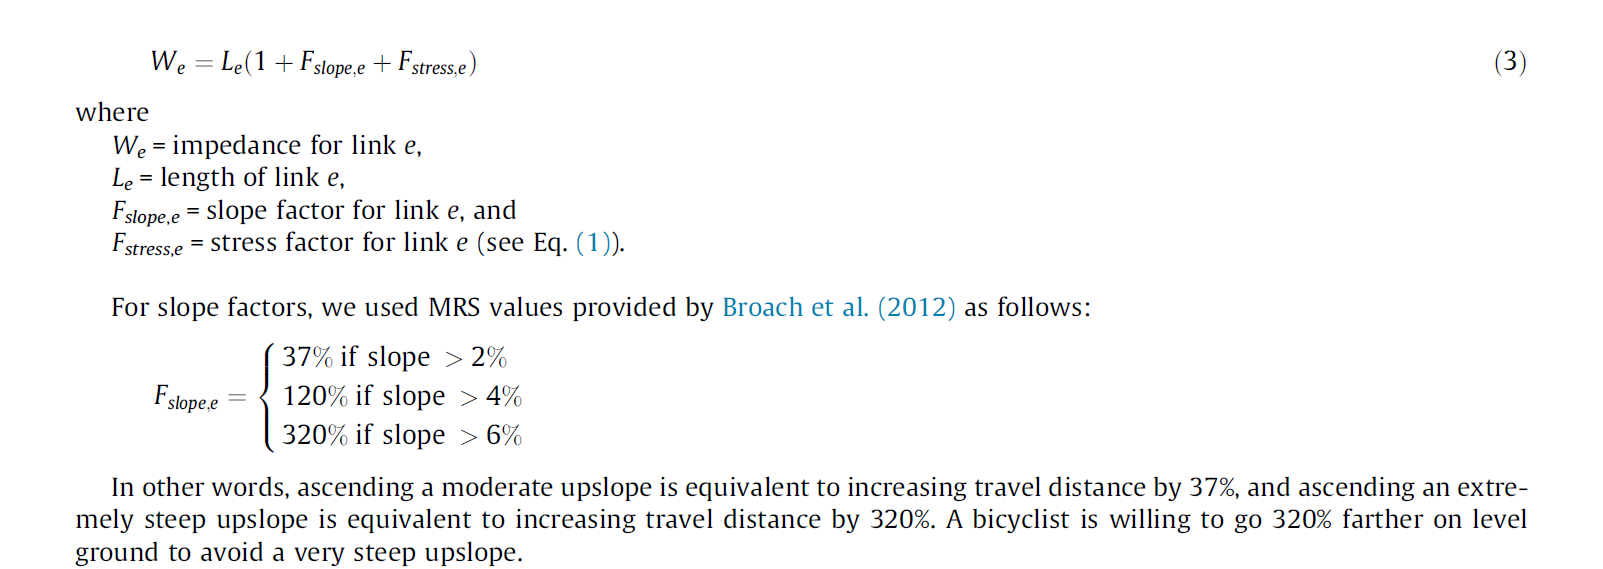

In [ ]:
# write a slope impedance function
def slope_correction(length,FT_SEG_STR,slope):
    if slope <=2:
        return length*(1+FT_SEG_STR)
    elif ((slope>2) and (slope<=4)):
        return length*(1+0.37+FT_SEG_STR)
    elif ((slope>4) and (slope<=6)):
        return length*(1+1.20+FT_SEG_STR)
    else:
        return length*(1+3.20+FT_SEG_STR)

In [ ]:
#barea_all1['FT_SEG_STR'].astype(str).astype(int)
barea_all1['FT_SEG_STR']=pd.to_numeric(barea_all1['FT_SEG_STR']).astype(int)
barea_all1['FT_SEG_STR'].dtypes

In [ ]:
barea_all1['impedance_of_link']=barea_all1.apply(lambda row: slope_correction(row['length'],row['FT_SEG_STR'],row['slope']),axis=1)
barea_all1.head(8)

In [ ]:
barea_all1['impedance_of_link']=barea_all1.apply(lambda row: slope_correction(row['length'],row['FT_SEG_STR'],row['slope']),axis=1)
barea_all1.head(8)

In [ ]:
# # save this file 
# # Import the node Connectivity
# crs = {'init': 'epsg:7131'}
# we_slope = gpd.GeoDataFrame(barea_all1, crs=crs, geometry = 'geometry')
# we_slope.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay area weight.shp")

In [ ]:
#barea_all1=gpd.read_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay area weight.shp")

In [ ]:
# Bring US Census track
census_track=gpd.read_file('H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Bay_Area_Census_tracts.shp')
census_track.head()

In [ ]:
census_track1=census_track.to_crs(epsg=7131)
census_track1.plot()

In [ ]:
# import SF Road_network
road_network=gpd.read_file('H:/mmmiah/Desktop/Bicycle Connectivity Project/SF Validation_data/LTS_data/Speed_aadt.shp')
road_network.crs

In [ ]:
sf_bd_proj = road_network.to_crs(epsg=7131)
sf_bd_proj=sf_bd_proj.unary_union.convex_hull
sf_bd_proj

In [ ]:
# read the boundary shape file
# study_bd=gpd.read_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/geo_export_b69ec18e-6a40-4637-94f6-1f3aafe63144.shp")
# study_bd

In [ ]:
# lets consider only Alameda for now
# sf_bd=study_bd.loc[study_bd['county']=='San Francisco']
# sf_bd1=gpd.GeoDataFrame.explode(sf_bd)
# sf_bd1

In [ ]:
# sf_bd1.crs

In [ ]:
# sf_bd_proj = sf_bd.to_crs(epsg=7131)
# sf_bd_proj.plot()

In [ ]:
# sf_bd_proj

In [ ]:
# sf_bd_proj['area']=sf_bd_proj.area*3.861e-7 # mile square
# sf_bd_proj

In [ ]:
# sf_area=sf_bd_proj[['area']].values
# sf_area

In [ ]:
# Convert to geodataframe
#abnormal_slope1=abnormal_slope.set_crs(epsg=4326)
#abnormal_slope2=abnormal_slope1.to_crs(epsg=7131)
barea_all2 = gpd.GeoDataFrame(barea_all1, crs="EPSG:4326", geometry='geometry')
barea_all3=barea_all2.to_crs(epsg=7131)
barea_all3.head()

In [ ]:
# Now lets crop the marin area of lTS network
sf_lts=gpd.clip(barea_all3,sf_bd_proj)
sf_lts.head()

In [ ]:
sf_lts.groupby(['FT_BIKE_IN']).count()

In [ ]:
sf_lts.crs

In [ ]:
sf_lts['length'].sum()

In [ ]:
# Convert the LTS shape file to graph to run the 
sf_lts_g=gpd.GeoDataFrame.explode(sf_lts)
sf_lts_g1 =momepy.gdf_to_nx(sf_lts_g, approach='primal')

In [ ]:
# check the parent graph characteristics
nx.number_connected_components(sf_lts_g1)

In [ ]:
#  f, ax = plt.subplots(1, 3, figsize=(18, 10), sharex=True, sharey=True)
#  sf_lts.plot(color='#e32e00', ax=ax[0])
#  for i, facet in enumerate(ax):
#      facet.set_title(("Streets", "Primal graph", "Overlay")[i])
#      facet.axis("off")
#  nx.draw(sf_lts_g1, {n:[n[0], n[1]] for n in list(sf_lts_g1.nodes)}, ax=ax[1], node_size=0.01)
# # sf_lts.plot(color='#e32e00', ax=ax[2], zorder=-1)
#  nx.draw(sf_lts_g1, {n:[n[0], n[1]] for n in list(sf_lts_g1.nodes)}, ax=ax[2], node_size=0.01)

In [ ]:
sf_lts['geometry'].convex_hull.plot()

In [ ]:
# Get the Convex Hull of the network
convex_hull_area = sf_lts.unary_union.convex_hull
# Show output
convex_hull_area

In [ ]:
census_track2_sf=gpd.clip(census_track1,convex_hull_area)
census_track2_sf.plot()

In [ ]:
convex_hull_area1=convex_hull_area.area*3.861e-7 # sq mile
convex_hull_area1

In [ ]:
# Calculate the number of Intersections
crossroad_nodes = [node for node in sf_lts_g1.nodes() if len(sf_lts_g1.edges(node)) > 2]


In [ ]:
def get_number_of_elements(list):
    count = 0
    for element in list:
        count += 1
    return count

#print("Number of elements in the list: ", get_number_of_elements(list_c))

In [ ]:
# Number of intersections where edge>2
NI=get_number_of_elements(crossroad_nodes)
NI

# Calculate the Bike Network Connectivity

In [ ]:
sf_lts['FT_BIKE_IN'].unique()

In [ ]:
# Get the motorway network and bike network based on functional class of the roads
#sf_motor_network=sf_lts[sf_lts['BIKE_LANE_'].isna()]
#sf_motor_network=sf_lts.loc[sf_lts['FT_BIKE_IN']!='path']
# consider entire network as the maximum attainable future bike network
sf_motor_network=sf_lts
# Plot the motor Network
sf_motor_network.plot(color='#e32e00')

In [ ]:
sf_motor_network.groupby(['FT_SEG_STR'])['length'].sum()*0.000621371

In [ ]:
sf_motor_network['length'].sum()*0.000621371 # mile

In [ ]:
# Plot the Bike Network
sf_bike_network=sf_lts.loc[sf_lts['FT_BIKE_IN']!='0']
sf_bike_network.plot(color='#e32e00')

In [ ]:
sf_bike_network.groupby(['FT_SEG_STR'])['length'].sum()*0.000621371

In [ ]:
sf_bike_network['length'].sum()*0.000621371

In [43]:
sf_bike_network.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [44]:
# save the bike network
crs = {'init': 'epsg:7131'}
sf_bn = gpd.GeoDataFrame(sf_bike_network, crs=crs, geometry = 'geometry')
sf_bn.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/SF_Bike_network.shp")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_20688\580048591.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sf_bn.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/SF_Bike_network.shp")


In [45]:
sf_lts.shape, sf_bike_network.shape, sf_motor_network.shape

((29184, 35), (7976, 35), (29184, 35))

In [46]:
sf_bike_network.tail()

,ROAD_ID,start_lon,start_lat,starting_e,end_lon,end_lat,ending_ele,osmid,FUNCTIONAL,PATH_ID,...,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,length,slope,geometry,impedance_of_link
477492,918870,-122.436039,37.806712,3,-122.435858,37.806735,4,{302293972},path,0,...,?,1,0,1,0,0,16.166896,6.185479,"LINESTRING (49229.458 30294.719, 49245.423 302...",84.067862
11272,872092,-122.429555,37.806916,24,-122.429704,37.806521,23,"{24526157,186433173}",path,0,...,?,1,1,1,0,0,45.778413,2.184436,"LINESTRING (49800.463 30317.500, 49796.766 303...",108.494840
402725,877519,-122.432003,37.807102,5,-122.432074,37.807008,5,{641730768},path,0,...,?,1,0,1,0,0,17.177908,0.000000,"LINESTRING (49584.846 30338.101, 49586.530 303...",34.355815
351521,904036,-122.429313,37.807307,25,-122.429555,37.806916,24,{24526157},path,0,...,?,1,0,1,1,0,48.499635,2.061871,"LINESTRING (49821.729 30360.904, 49819.907 303...",114.944136
409282,877522,-122.429859,37.807619,5,-122.432003,37.807102,5,{641730768},path,0,...,?,1,0,1,0,0,971.101411,0.000000,"LINESTRING (49773.666 30395.490, 49746.374 305...",1942.202823


In [47]:
def node_level_connectivity_score (sf_motor_network,sf_bike_network):
    connectivity_score=[]
    sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
    sf_lts_motor_g1 =momepy.gdf_to_nx(sf_lts_motor_g, approach='primal')
    #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
    motor_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_motor_g1,cutoff=39590, weight='impedance_of_link'))
    # Convert the shorsted path distance distionary to dataframe
    sf_sheortst_path_motor_length=pd.DataFrame.from_dict(motor_length)
    # Calculate the total motor path
    sf_sheortst_path_motor_length['total_motor_path']=sf_sheortst_path_motor_length.sum(numeric_only=True, axis=0)
    sf_sheortst_path_motor_length1=sf_sheortst_path_motor_length[['total_motor_path']]
    # make total motor path as dictonary
    ms_outcomes=sf_sheortst_path_motor_length1.T.to_dict('list')
    # add motor path attribute with grpah nodes
    nx.set_node_attributes(sf_lts_motor_g1, values=ms_outcomes, name="total_motor_path")
    nodes_motor, edges_motor = momepy.nx_to_gdf(sf_lts_motor_g1)
    nodes_motor['total_motor_path'] = nodes_motor['total_motor_path'].str[0]
    
    
    # do it for bike Path
    sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)
    sf_lts_bike_g1 =momepy.gdf_to_nx(sf_lts_bike_g, approach='primal')
    #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
    bike_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_bike_g1,cutoff=39590, weight='impedance_of_link'))
    # Convert the shorsted path distance distionary to dataframe
    sf_shortest_path_bike_length=pd.DataFrame.from_dict(bike_length)
    # Calculate the total bike path
    sf_shortest_path_bike_length['total_bike_path']=sf_shortest_path_bike_length.sum(numeric_only=True, axis=0)
    sf_shortest_path_bike_length1=sf_shortest_path_bike_length[['total_bike_path']]
    # make total motor path as dictonary
    bs_outcomes=sf_shortest_path_bike_length1.T.to_dict('list')
    # add motor path attribute with grpah nodes
    nx.set_node_attributes(sf_lts_bike_g1, values=bs_outcomes, name="total_bike_path")
    nodes_bike, edges_bike = momepy.nx_to_gdf(sf_lts_bike_g1)
    nodes_bike['total_bike_path'] = nodes_bike['total_bike_path'].str[0]

    #connectivity score
    shortest_path=pd.merge(nodes_motor,nodes_bike,on=['geometry'],how='outer')
    shortest_path1=shortest_path.fillna(0)
    shortest_path1['CS']= shortest_path1['total_bike_path']/shortest_path1['total_motor_path']
    shortest_path1= shortest_path1.replace(np.inf, 1)
    return shortest_path1 


In [48]:
# define grade of connectivity
def count_census_block(Connectivity_score):
    if Connectivity_score>=1:
        return 'excellently connected'
    elif (Connectivity_score>=0.90 and Connectivity_score<1.0):
        return 'very well connected  '
    elif (Connectivity_score>=0.60 and Connectivity_score<0.90):
        return 'well connected'
    elif (Connectivity_score>=0.30 and Connectivity_score<0.60):
        return 'fairly connected'
    else:
        return 'poorly connected'

In [49]:
%%time
al_connectivity=node_level_connectivity_score (sf_motor_network,sf_bike_network)
al_connectivity.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_20688\4180809354.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_20688\4180809354.py:21: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)


CPU times: total: 55min 6s
Wall time: 55min 7s


,total_motor_path,nodeID_x,geometry,total_bike_path,nodeID_y,CS
0,5.195248e+08,0,POINT (43319.112 21173.421),8.207942e+05,0.0,0.001580
1,4.730575e+08,1,POINT (43562.119 20568.580),5.909887e+05,1.0,0.001249
2,5.119564e+08,2,POINT (42833.132 23900.282),1.172553e+08,2.0,0.229034
3,5.114591e+08,3,POINT (42843.850 23901.452),1.174899e+08,3.0,0.229715
4,4.999551e+08,4,POINT (42801.807 24313.960),1.194033e+08,5.0,0.238828


In [73]:
al_connectivity['total_motor_path'].describe()

count    2.262500e+04
mean     4.214173e+08
std      8.313953e+07
min      3.980806e+00
25%      3.789257e+08
50%      4.394693e+08
75%      4.757259e+08
max      5.464480e+08
Name: total_motor_path, dtype: float64

In [50]:
al_connectivity.shape

(22625, 6)

In [51]:
# overall Area Connectivity
BMN_Area_CS=al_connectivity['total_bike_path'].sum()/al_connectivity['total_motor_path'].sum()
BMN_Area_CS

0.062254931023139476

In [52]:
al_connectivity['CS'].median()

0.0

In [53]:
# Save the SF County node level Connectivity
crs = {'init': 'epsg:7131'}
gdf_al = gpd.GeoDataFrame(al_connectivity, crs=crs, geometry = 'geometry')
gdf_al.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/SF_node_level_connectivity.shp")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_20688\1590880229.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_al.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/SF_node_level_connectivity.shp")


In [54]:
input_census_tract=census_track2_sf.reset_index()
input_census_tract.shape

(247, 18)

In [55]:
def census_node_level_connectivity_score (sf_connectivity,input_census_tract):
    census_score=gpd.sjoin(sf_connectivity,input_census_tract)
    census_score1=pd.DataFrame({'Meadian CS':census_score.groupby(['GISJOIN'])['CS'].median()}).reset_index()
    census_score2=pd.merge(census_score1,input_census_tract, on=['GISJOIN'], how='inner' )
    return census_score2 

In [56]:
# save the results by Census Tract
CS_median=census_node_level_connectivity_score (al_connectivity,input_census_tract)
CS_median.head()

,GISJOIN,Meadian CS,index,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,G0600750010101,0.0,732,06,075,010101,06075010101,101.01,Census Tract 101.01,G5020,S,696934.0,646917.0,+37.8085195,-122.4095545,21764.654020,12265.133958,638229.374346,"POLYGON ((52125.405 30119.193, 52095.465 30115..."
1,G0600750010102,0.0,733,06,075,010102,06075010102,101.02,Census Tract 101.02,G5020,S,79556.0,0.0,+37.8046900,-122.4139437,1202.159619,1202.159619,79555.896086,"POLYGON ((51271.673 29972.852, 51238.826 29967..."
2,G0600750010201,0.0,734,06,075,010201,06075010201,102.01,Census Tract 102.01,G5020,S,186873.0,0.0,+37.8013029,-122.4212147,1817.457273,1817.457273,186870.296630,"POLYGON ((50812.889 29847.482, 50821.185 29794..."
3,G0600750010202,0.0,735,06,075,010202,06075010202,102.02,Census Tract 102.02,G5020,S,332254.0,295382.0,+37.8106454,-122.4245951,4546.713085,4050.461855,333375.029584,"MULTIPOLYGON (((50125.119 30372.719, 50120.802..."
4,G0600750010300,0.0,736,06,075,010300,06075010300,103,Census Tract 103,G5020,S,268261.0,0.0,+37.8016200,-122.4156810,2324.328320,2324.328320,268257.279786,"POLYGON ((50922.182 30092.594, 50989.749 30033..."


In [57]:
# Import the node Connectivity
crs = {'init': 'epsg:7131'}
CS_median1 = gpd.GeoDataFrame(CS_median, crs=crs, geometry = 'geometry')
CS_median1.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/SF_level_Median_BMN_CS.shp")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


# Assign the Grade of the Connectivity for Bike Network-micro connectivity

In [58]:
#m=gpd.read_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/Marin_Census_level_Median_BMN_CS.shp")
CS_median['cs_ranking']=CS_median.apply(lambda row:count_census_block(row['Meadian CS']),axis=1 )
# Now count the census tract for Bay area by cs ranking
CS_median.groupby(['cs_ranking'])['GISJOIN'].count()

cs_ranking
fairly connected      1
poorly connected    246
Name: GISJOIN, dtype: int64

# Assign the Grade of the Connectivity for Bike Network-macro connectivity

In [59]:
# Join the nodel level shortest path results with census tract
AC=gpd.sjoin(al_connectivity,input_census_tract)
# aggregrate total bike path by census tract
AC1=pd.DataFrame({'total_bike_path':AC.groupby(['GISJOIN'])['total_bike_path'].sum()}).reset_index()
# aggregrate total motor path by census tract
AC2=pd.DataFrame({'total_motor_path':AC.groupby(['GISJOIN'])['total_motor_path'].sum()}).reset_index()
# join total bike and motor path processing data by census tract GISJOIN id
ACS=pd.merge(AC1, AC2, on=['GISJOIN'], how='inner')
# calculate area connectivity by each census tract
ACS['ACS']=ACS['total_bike_path']/ACS['total_motor_path']
# assigm the grade of the census tract
ACS['cs_ranking']=ACS.apply(lambda row:count_census_block(row['ACS']),axis=1 )
# Now count the census tract for Bay area by cs ranking
ACS.groupby(['cs_ranking'])['GISJOIN'].count()

cs_ranking
poorly connected    247
Name: GISJOIN, dtype: int64

# Calculate Low Stress Network Connectivity

<AxesSubplot: >

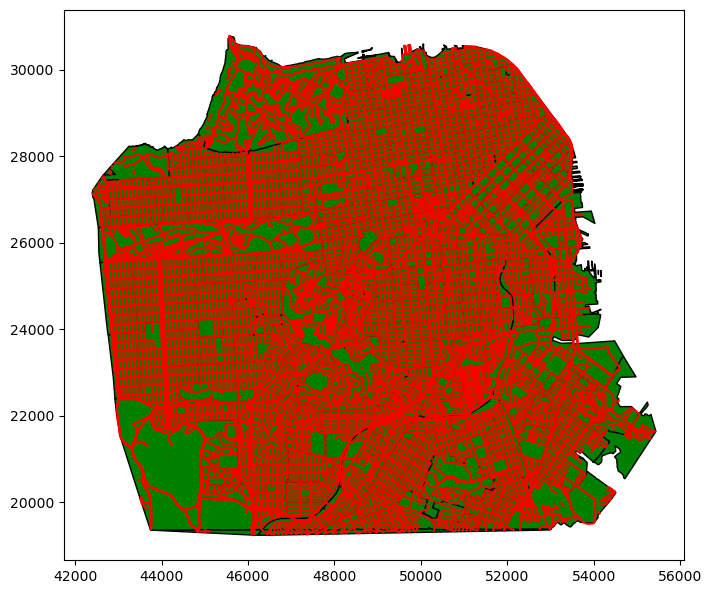

In [60]:
fig, ax = plt.subplots(figsize = (8,8)) 
census_track2_sf.plot(ax=ax,color="green",edgecolor='k')
sf_lts.geometry.plot(color="red",edgecolor='k',ax=ax)

In [ ]:
# Split the network as low network to get the connectivity 
sf_motor_network_op2=sf_motor_network
sf_low_stress_network_op2=sf_lts.loc[sf_lts['FT_SEG_STR']<3]

In [62]:
sf_low_stress_network_op2.groupby(['FT_SEG_STR'])['length'].sum()*0.000621371

FT_SEG_STR
1    785.685502
2      3.459293
Name: length, dtype: float64

In [63]:
sf_low_stress_network_op2['length'].sum()*0.000621371

789.1447958661956

In [64]:
# save the low Stress network
crs = {'init': 'epsg:7131'}
sf_lsn = gpd.GeoDataFrame(sf_low_stress_network_op2, crs=crs, geometry = 'geometry')
sf_lsn.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/SF_low_stress_network.shp")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_20688\160278252.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sf_lsn.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/SF_low_stress_network.shp")


In [65]:
%%time
node_level_MLN_CS= node_level_connectivity_score(sf_motor_network_op2,sf_low_stress_network_op2)
node_level_MLN_CS.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_20688\4180809354.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_20688\4180809354.py:21: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)


CPU times: total: 1h 3min 47s
Wall time: 1h 3min 48s


,total_motor_path,nodeID_x,geometry,total_bike_path,nodeID_y,CS
0,5.195248e+08,0,POINT (43319.112 21173.421),0.000000e+00,0.0,0.000000
1,4.730575e+08,1,POINT (43562.119 20568.580),0.000000e+00,0.0,0.000000
2,5.119564e+08,2,POINT (42833.132 23900.282),1.645888e+08,0.0,0.321490
3,5.114591e+08,3,POINT (42843.850 23901.452),1.651599e+08,1.0,0.322919
4,4.999551e+08,4,POINT (42801.807 24313.960),1.710892e+08,3.0,0.342209


In [66]:
# overall Area Connectivity
LMN_Area_CS=node_level_MLN_CS['total_bike_path'].sum()/node_level_MLN_CS['total_motor_path'].sum()
LMN_Area_CS

0.18022122406431057

In [67]:
node_level_MLN_CS['CS'].median()

0.02781686470246881

In [68]:
# Import the node Connectivity
crs = {'init': 'epsg:7131'}
sfcs1 = gpd.GeoDataFrame(node_level_MLN_CS, crs=crs, geometry = 'geometry')
sfcs1.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/SF_node_level_LMN_CS.shp")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_20688\415884777.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sfcs1.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/SF_node_level_LMN_CS.shp")


In [69]:
CS_median1=census_node_level_connectivity_score (node_level_MLN_CS,input_census_tract)
CS_median1.head()

,GISJOIN,Meadian CS,index,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,G0600750010101,0.417752,732,06,075,010101,06075010101,101.01,Census Tract 101.01,G5020,S,696934.0,646917.0,+37.8085195,-122.4095545,21764.654020,12265.133958,638229.374346,"POLYGON ((52125.405 30119.193, 52095.465 30115..."
1,G0600750010102,0.421205,733,06,075,010102,06075010102,101.02,Census Tract 101.02,G5020,S,79556.0,0.0,+37.8046900,-122.4139437,1202.159619,1202.159619,79555.896086,"POLYGON ((51271.673 29972.852, 51238.826 29967..."
2,G0600750010201,0.405905,734,06,075,010201,06075010201,102.01,Census Tract 102.01,G5020,S,186873.0,0.0,+37.8013029,-122.4212147,1817.457273,1817.457273,186870.296630,"POLYGON ((50812.889 29847.482, 50821.185 29794..."
3,G0600750010202,0.397366,735,06,075,010202,06075010202,102.02,Census Tract 102.02,G5020,S,332254.0,295382.0,+37.8106454,-122.4245951,4546.713085,4050.461855,333375.029584,"MULTIPOLYGON (((50125.119 30372.719, 50120.802..."
4,G0600750010300,0.421520,736,06,075,010300,06075010300,103,Census Tract 103,G5020,S,268261.0,0.0,+37.8016200,-122.4156810,2324.328320,2324.328320,268257.279786,"POLYGON ((50922.182 30092.594, 50989.749 30033..."


In [70]:
# Import the node Connectivity
crs = {'init': 'epsg:7131'}
CS_median2 = gpd.GeoDataFrame(CS_median1, crs=crs, geometry = 'geometry')
CS_median2.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/SF_census_level_LMN_CS.shp")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


# Assign the Grade of the Connectivity for low Stress Network-micro connectivity

In [71]:
#mrl=gpd.read_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/Marin_census_level_LMN_CS.shp")
CS_median1 ['cs_ranking']=CS_median1 .apply(lambda row:count_census_block(row['Meadian CS']),axis=1 )
# Now count the census tract for Bay area by cs ranking
CS_median1.groupby(['cs_ranking'])['GISJOIN'].count()

cs_ranking
fairly connected    111
poorly connected    136
Name: GISJOIN, dtype: int64

# Assign the Grade of the Connectivity for low stress Network-macro connectivity

In [72]:
# Join the nodel level shortest path results with census tract
AC=gpd.sjoin(node_level_MLN_CS,input_census_tract)
# aggregrate total bike path by census tract
AC1=pd.DataFrame({'total_bike_path':AC.groupby(['GISJOIN'])['total_bike_path'].sum()}).reset_index()
# aggregrate total motor path by census tract
AC2=pd.DataFrame({'total_motor_path':AC.groupby(['GISJOIN'])['total_motor_path'].sum()}).reset_index()
# join total bike and motor path processing data by census tract GISJOIN id
ACS=pd.merge(AC1, AC2, on=['GISJOIN'], how='inner')
# calculate area connectivity by each census tract
ACS['ACS']=ACS['total_bike_path']/ACS['total_motor_path']
# assigm the grade of the census tract
ACS['cs_ranking']=ACS.apply(lambda row:count_census_block(row['ACS']),axis=1 )
# Now count the census tract for Bay area by cs ranking
ACS.groupby(['cs_ranking'])['GISJOIN'].count()

cs_ranking
fairly connected     65
poorly connected    182
Name: GISJOIN, dtype: int64

# end of the Code

## Degree

In [152]:
%%time
# Lets check the degree centrality for bike network 
from numpy import array
bn_d=gpd.GeoDataFrame.explode(sf_bike_network)
bn_d1 =momepy.gdf_to_nx(bn_d, approach='primal')
degreeb = dict(nx.degree(bn_d1))
nx.set_node_attributes(bn_d1, degreeb, 'degree')
print('min_dc:', array([degreeb[k] for k in degreeb]).min())
print('mean_dc:',array([degreeb[k] for k in degreeb]).mean())
print('max_dc:',array([degreeb[k] for k in degreeb]).max())
print('std_dc:',array([degreeb[k] for k in degreeb]).std())

min_dc: 1
mean_dc: 2.02996348986529
max_dc: 5
std_dc: 0.6123974851106656
CPU times: total: 719 ms
Wall time: 719 ms


In [146]:
nodes_sf, edges_sf = momepy.nx_to_gdf(bn_d1)
#edges_SF_Bike=edges_sf.drop(['geometry_x', 'start_lon', 'start_lat', 'starting_ele','geometry_y', 'end_lon', 'end_lat','starting point', 'ending point',],axis=1)
nodes_sf.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/degree_nodes_SF_Bike_Network.shp")
edges_sf.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/edges_SF_Bike_Network.shp")

In [147]:
nodes_sf.groupby(['degree'])['nodeID'].count()

degree
1    1101
2    5763
3     832
4     234
5      13
Name: nodeID, dtype: int64

In [151]:
%%time
# Lets check the degree centrality for low Stress network 
from numpy import array
bn_ls=gpd.GeoDataFrame.explode(sf_low_stress_network_op2)
bn_ls1 =momepy.gdf_to_nx(bn_ls, approach='primal')
degreel = dict(nx.degree(bn_ls1))
nx.set_node_attributes(bn_ls1, degreel, 'degree')
print('min_dc:', array([degreel[k] for k in degreel]).min())
print('mean_dc:',array([degreel[k] for k in degreel]).mean())
print('max_dc:',array([degreel[k] for k in degreel]).max())
print('std_dc:',array([degreel[k] for k in degreel]).std())

min_dc: 1
mean_dc: 2.207009788443322
max_dc: 6
std_dc: 0.8848948857665953
CPU times: total: 1.61 s
Wall time: 1.6 s


In [148]:
nodes_sf, edges_sf = momepy.nx_to_gdf(bn_ls1)
#edges_SF_Bike=edges_sf.drop(['geometry_x', 'start_lon', 'start_lat', 'starting_ele','geometry_y', 'end_lon', 'end_lat','starting point', 'ending point',],axis=1)
nodes_sf.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/degree_nodes_SF_ls_Network.shp")
edges_sf.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/edges_SF_ls_Network.shp")

In [149]:
nodes_sf.groupby(['degree'])['nodeID'].count()

degree
1    3030
2    8319
3    2710
4    1732
5      42
6       2
Name: nodeID, dtype: int64

# Eigenvector Centrality

# For bike Network

In [154]:
%%time
D = ox.utils_graph.get_digraph(bn_d1, weight="impedance_of_link")
Eigene_centrality_bn = nx.eigenvector_centrality(D,weight="impedance_of_link",max_iter=10000)
nx.set_node_attributes(bn_d1, values=Eigene_centrality_bn, name="Eigene_centrality")

CPU times: total: 5min 3s
Wall time: 5min 3s


In [155]:
nodes_ecb, edges_ecb = momepy.nx_to_gdf(bn_d1)
nodes_ecb.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/EC_nodes_bn_sf.shp")
edges_ecb.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/EC_edges_bn_sf.shp")

# For Low Stress Network

In [156]:
%%time
Dl = ox.utils_graph.get_digraph(bn_ls1, weight="impedance_of_link")
Eigene_centrality_ls = nx.eigenvector_centrality(Dl,weight="impedance_of_link",max_iter=10000)
nx.set_node_attributes(bn_ls1, values=Eigene_centrality_ls, name="Eigene_centrality")

CPU times: total: 7min 56s
Wall time: 7min 56s


In [157]:
nodes_ecl, edges_ecl = momepy.nx_to_gdf(bn_ls1)
nodes_ecl.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/EC_nodes_ls_sf.shp")
edges_ecl.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/EC_edges_ls_sf.shp")

# Modularity

# For bike Network

In [158]:
%%time
from networkx.algorithms import community
from operator import itemgetter
communities = community.greedy_modularity_communities(bn_d1)

modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(bn_d1, modularity_dict, 'modularity')

CPU times: total: 1.66 s
Wall time: 1.66 s


In [159]:
nodes_bn_sf, edges_bn_sf = momepy.nx_to_gdf(bn_d1)
nodes_bn_sf.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/mo_bn_nodes_sf.shp")
edges_bn_sf.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/mo_bn_edges_sf.shp")

# For Low Stress Network

In [160]:
%%time
from networkx.algorithms import community
from operator import itemgetter
communities = community.greedy_modularity_communities(bn_ls1)

modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(bn_ls1, modularity_dict, 'modularity')

CPU times: total: 2.34 s
Wall time: 2.33 s


In [162]:
nodes_ls_sf, edges_ls_sf = momepy.nx_to_gdf(bn_ls1)
nodes_ls_sf.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/mo_ls_nodes_sf.shp")
edges_ls_sf.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/mo_ls_edges_sf.shp")

# Closeness Centrality

# For bike Network

In [179]:
%%time
# calculate node closeness centrality of the line graph
edge_centrality_cc = nx.closeness_centrality(nx.line_graph(bn_d1),distance="impedance_of_link")
nx.set_node_attributes(bn_d1, values=edge_centrality_cc, name="cc")
#nx.set_edge_attributes(bn_d1, edge_centrality_cc, "cc")

CPU times: total: 4min 4s
Wall time: 4min 4s


In [180]:
nodes2, edges2 = momepy.nx_to_gdf(bn_d1)
nodes2.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/CC_nodes_sf_bn.shp")
edges2.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/CC_edges_sf_bn.shp")

In [184]:
edges2.head()

,ROAD_ID,start_lon,start_lat,starting_e,end_lon,end_lat,ending_ele,osmid,FUNCTIONAL,PATH_ID,...,XWALK,length,slope,impedance_of_link,geometry,mm_len,edge_centrality,cc,node_start,node_end
0,918176,-122.503142,37.714168,56,-122.503219,37.714233,55,{287653454},path,0,...,0,22.655456,4.413948,72.497459,"LINESTRING (43314.360 20024.235, 43312.129 200...",22.655456,0.000248,0.000248,0,1
1,918177,-122.503142,37.714168,56,-122.503219,37.714233,55,{287653454},path,0,...,0,10.679609,9.363638,55.533969,"LINESTRING (43314.360 20024.235, 43313.375 200...",10.679609,0.000248,0.000248,0,1
2,918179,-122.503231,37.714364,58,-122.503219,37.714233,55,{287653461},path,0,...,0,17.253511,17.387765,89.718260,"LINESTRING (43306.516 20046.060, 43307.361 200...",17.253511,0.000248,0.000248,1,2
3,958473,-122.502366,37.714298,56,-122.501129,37.714856,56,{506575391},path,0,...,0,131.803597,0.000000,263.607195,"LINESTRING (43382.729 20038.659, 43389.392 200...",131.803597,0.000248,0.000248,3,4
4,921863,-122.501129,37.714856,56,-122.500440,37.713479,56,{506575391},path,0,...,0,169.376454,0.000000,338.752907,"LINESTRING (43491.832 20100.465, 43499.870 200...",169.376454,0.000248,0.000248,4,497


# For Low Stress Network

In [182]:
%%time
# calculate node closeness centrality of the line graph
edge_centrality = nx.closeness_centrality(nx.line_graph(bn_ls1),distance="impedance_of_link")
nx.set_edge_attributes(bn_ls1, values=edge_centrality, name="edge_centrality")

CPU times: total: 17min 40s
Wall time: 17min 40s


In [183]:
nodes2l, edges2l = momepy.nx_to_gdf(bn_ls1)
nodes2l.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/CC_nodes_sf_ls.shp")
edges2l.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/CC_edges_sf_ls.shp")

# Betweenness Centrality

# For bike Network

In [169]:
%%time
# calculate node betweenness centrality, weighted by travel time
D2_sf = ox.utils_graph.get_digraph(bn_d1, weight="impedance_of_link")
bc = nx.betweenness_centrality(D2_sf, weight="impedance_of_link", normalized=True)
nx.set_node_attributes(bn_d1, values=bc, name="bc")

CPU times: total: 7min 22s
Wall time: 7min 22s


In [171]:
nodes_bc_sf, edges_bc_sf = momepy.nx_to_gdf(bn_d1)
nodes_bc_sf.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/BC_nodes_sf_bn.shp")
edges_bc_sf.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/BC_edges_sf_bn.shp")

# For Low Stress Network

In [172]:
%%time
# calculate node betweenness centrality, weighted by travel time
D2_sf_ls = ox.utils_graph.get_digraph(bn_ls1, weight="impedance_of_link")
bc = nx.betweenness_centrality(D2_sf_ls, weight="impedance_of_link", normalized=True)
nx.set_node_attributes(bn_ls1, values=bc, name="bc")

CPU times: total: 28min 21s
Wall time: 28min 21s


In [173]:
nodes_bc_sf_ls, edges_bc_sf_ls = momepy.nx_to_gdf(bn_ls1)
nodes_bc_sf_ls.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/BC_nodes_sf_ls.shp")
edges_bc_sf_ls.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Advanced_Graph Theory for SF/BC_edges_sf_ls.shp")

# End of the Code